In [ ]:
!pip install pyspellchecker

     |████████████████████████████████| 2.7 MB 2.7 MB/s 


In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from spellchecker import SpellChecker
from wordcloud import WordCloud

import pickle
import nltk

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from numpy import *


sns.set(style='whitegrid')
sns.color_palette('husl', 16)
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format 

In [ ]:
# download nltk related words
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone/sample30.csv')

In [ ]:
ratings.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [ ]:
ratings.shape

(30000, 15)

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [ ]:
ratings.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

### Dropping rows that have null values

In [ ]:
ratings = ratings[~ratings['reviews_doRecommend'].isnull()]
ratings = ratings[~ratings['reviews_username'].isnull()]
ratings = ratings[~ratings['user_sentiment'].isnull()]

In [ ]:
ratings.shape

(27395, 15)

In [ ]:
ratings.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date                0
reviews_didPurchase     11925
reviews_doRecommend         0
reviews_rating              0
reviews_text                0
reviews_title              24
reviews_userCity        25834
reviews_userProvince    27300
reviews_username            0
user_sentiment              0
dtype: int64

### Helper methods

In [ ]:
def add_labels_to_countplot(ax):
  for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()+5))

In [ ]:
def remove_punctuation(text):
  punc_chars = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  no_punct = ""
  for char in text:
   if char not in punc_chars:
      no_punct = no_punct + char
  return no_punct

In [ ]:
def remove_numbers(text):
  return re.sub(r'\d+', '', text)

In [ ]:
stop_words = stopwords.words('english') # get english stop words

def remove_singlechars(text):
  words = word_tokenize(text)
  valid_words = []
  for word in words:
    if len(word) > 1:
      valid_words.append(word)
  return " ".join(valid_words)

def remove_stopwords(text):
  words = word_tokenize(text)
  non_stop_words = []
  for word in words:
    if word not in stop_words:
      non_stop_words.append(word)
  return " ".join(non_stop_words)

In [ ]:
ws_tokenizer = nltk.tokenize.WhitespaceTokenizer()
stemmer = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()

def stemming(text):
  words = word_tokenize(text)
  stem_words = [stemmer.stem(word) for word in words]
  return " ".join(stem_words)

def lemmatize(text):
  words = ws_tokenizer.tokenize(text)
  lemma_words = [lemmatizer.lemmatize(word) for word in words]
  return " ".join(lemma_words)


In [ ]:
def get_text(sentiment):
  data = sentiment_df[sentiment_df['user_sentiment'] == sentiment]
  return ' '.join(data['text_data'])

def generate_wordcloud(sentiment):
  words = get_text(sentiment)
  wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(words)
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)  
  plt.show()

## Univariate analysis

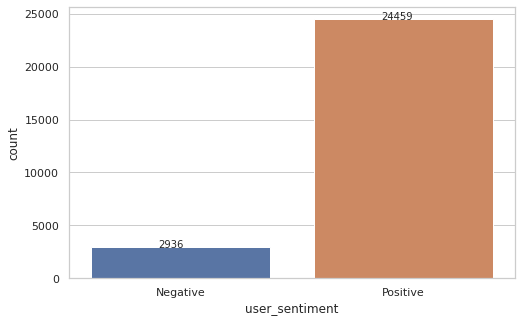

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='user_sentiment', data=ratings)
add_labels_to_countplot(ax)
plt.show()

### Observations

- There is clearly class imbalance in the reviews

In [ ]:
ratings['manufacturer'].value_counts()

Clorox                       8497
Test                         3325
AmazonUs/CLOO7               2008
Walt Disney                  1141
L'oreal Paris                1080
                             ... 
Carson-Dellosa Publishing       1
SBME SPECIAL MKTS.              1
Herr's                          1
Sizzix                          1
Annies Homegrown                1
Name: manufacturer, Length: 178, dtype: int64

In [ ]:
top_manufacturer = ratings['manufacturer'].value_counts().sort_values(ascending=False).head(10)
top_manufacturer

Clorox                   8497
Test                     3325
AmazonUs/CLOO7           2008
Walt Disney              1141
L'oreal Paris            1080
SONY CORP                 844
Burt's Bees               794
Twentieth Century Fox     757
P&G                       688
Summit Entertainment      669
Name: manufacturer, dtype: int64

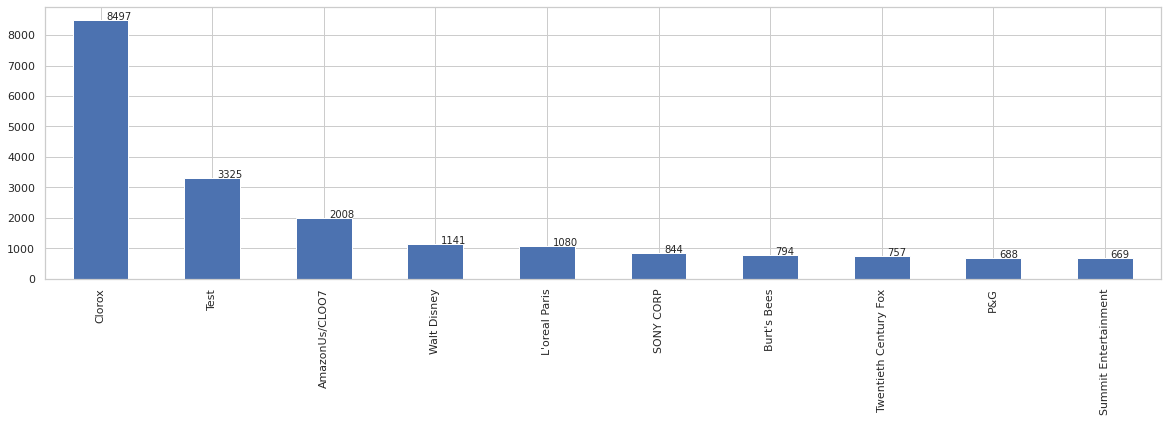

In [ ]:
plt.figure(figsize=(20,5))
ax = top_manufacturer.plot(kind='bar')
add_labels_to_countplot(ax)
plt.show()

### Observations

- Clorox has the maximum number of products

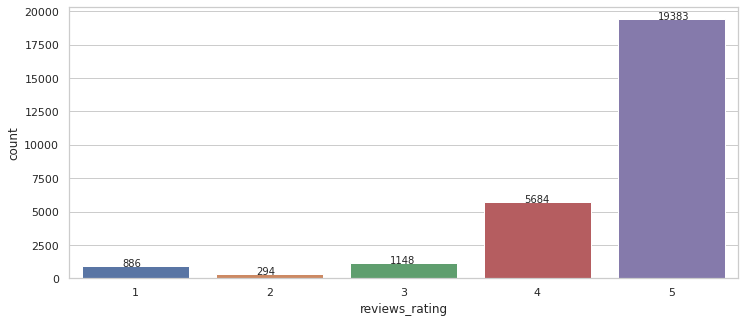

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='reviews_rating', data=ratings)
add_labels_to_countplot(ax)
plt.show()

### Observations

- The data contains mostly happy customers

## Data cleaning and pre-processing

### Filtering out columns that are not needed

In [ ]:
cols = ['id', 'name', 'reviews_rating', 'reviews_text', 'reviews_title','reviews_username', 'user_sentiment'] 
master_ratings = ratings[cols]
master_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27395 entries, 3 to 29999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                27395 non-null  object
 1   name              27395 non-null  object
 2   reviews_rating    27395 non-null  int64 
 3   reviews_text      27395 non-null  object
 4   reviews_title     27371 non-null  object
 5   reviews_username  27395 non-null  object
 6   user_sentiment    27395 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB


### Merging reviews and title so they could be processed together

In [ ]:
master_ratings['text_data'] = master_ratings['reviews_title'] + ' ' + master_ratings['reviews_text']
master_ratings.head()

,id,name,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,text_data
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative,Disappointed I read through the reviews on her...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative,Irritation My husband bought this gel for us. ...
5,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,My boyfriend and I bought this to spice things...,Not worth it,samantha,Negative,Not worth it My boyfriend and I bought this to...
6,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,Bought this earlier today and was excited to c...,Disappointing,raeanne,Negative,Disappointing Bought this earlier today and wa...
7,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,I bought this product for my husband and I to ...,Not happy at all,kimmie,Negative,Not happy at all I bought this product for my ...


### Dropping reviews and title as they are combined now

In [ ]:
# lets remove reviews text and title as we have merged them already
final_ratings = master_ratings.drop(columns=['reviews_text', 'reviews_title'])
final_ratings.head()

,id,name,reviews_rating,reviews_username,user_sentiment,text_data
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,rebecca,Negative,Disappointed I read through the reviews on her...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,walker557,Negative,Irritation My husband bought this gel for us. ...
5,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,samantha,Negative,Not worth it My boyfriend and I bought this to...
6,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,raeanne,Negative,Disappointing Bought this earlier today and wa...
7,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,kimmie,Negative,Not happy at all I bought this product for my ...


## Seprating data needed for sentiment analysis

In [ ]:
sentiment_df = final_ratings[['id', 'text_data', 'user_sentiment']]
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27395 entries, 3 to 29999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              27395 non-null  object
 1   text_data       27371 non-null  object
 2   user_sentiment  27395 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


### Seprating out data needed for product recommendation

In [ ]:
recommendation_df = final_ratings[['id', 'reviews_rating', 'reviews_username']]
recommendation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27395 entries, 3 to 29999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                27395 non-null  object
 1   reviews_rating    27395 non-null  int64 
 2   reviews_username  27395 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


## Text processing

In [ ]:
sentiment_df.head()

,id,text_data,user_sentiment
3,AV16khLE-jtxr-f38VFn,Disappointed I read through the reviews on her...,Negative
4,AV16khLE-jtxr-f38VFn,Irritation My husband bought this gel for us. ...,Negative
5,AV16khLE-jtxr-f38VFn,Not worth it My boyfriend and I bought this to...,Negative
6,AV16khLE-jtxr-f38VFn,Disappointing Bought this earlier today and wa...,Negative
7,AV16khLE-jtxr-f38VFn,Not happy at all I bought this product for my ...,Negative


### Converting text to lower case

In [ ]:
sentiment_df['user_sentiment'] = sentiment_df['user_sentiment'].apply(lambda x: str(x).lower())
sentiment_df['text_data'] = sentiment_df['text_data'].apply(lambda x: str(x).lower())
sentiment_df.head()

,id,text_data,user_sentiment
3,AV16khLE-jtxr-f38VFn,disappointed i read through the reviews on her...,negative
4,AV16khLE-jtxr-f38VFn,irritation my husband bought this gel for us. ...,negative
5,AV16khLE-jtxr-f38VFn,not worth it my boyfriend and i bought this to...,negative
6,AV16khLE-jtxr-f38VFn,disappointing bought this earlier today and wa...,negative
7,AV16khLE-jtxr-f38VFn,not happy at all i bought this product for my ...,negative


### Removing special characters

In [ ]:
sentiment_df['text_data'] = sentiment_df['text_data'].apply(remove_punctuation)
sentiment_df.head()

,id,text_data,user_sentiment
3,AV16khLE-jtxr-f38VFn,disappointed i read through the reviews on her...,negative
4,AV16khLE-jtxr-f38VFn,irritation my husband bought this gel for us t...,negative
5,AV16khLE-jtxr-f38VFn,not worth it my boyfriend and i bought this to...,negative
6,AV16khLE-jtxr-f38VFn,disappointing bought this earlier today and wa...,negative
7,AV16khLE-jtxr-f38VFn,not happy at all i bought this product for my ...,negative


### Removing numbers

In [ ]:
sentiment_df['text_data'] = sentiment_df['text_data'].apply(remove_numbers)
sentiment_df.head()

,id,text_data,user_sentiment
3,AV16khLE-jtxr-f38VFn,disappointed i read through the reviews on her...,negative
4,AV16khLE-jtxr-f38VFn,irritation my husband bought this gel for us t...,negative
5,AV16khLE-jtxr-f38VFn,not worth it my boyfriend and i bought this to...,negative
6,AV16khLE-jtxr-f38VFn,disappointing bought this earlier today and wa...,negative
7,AV16khLE-jtxr-f38VFn,not happy at all i bought this product for my ...,negative


### Removing single characters

In [ ]:
sentiment_df['text_data'] = sentiment_df['text_data'].apply(remove_singlechars)
sentiment_df.head()

,id,text_data,user_sentiment
3,AV16khLE-jtxr-f38VFn,disappointed read through the reviews on here ...,negative
4,AV16khLE-jtxr-f38VFn,irritation my husband bought this gel for us t...,negative
5,AV16khLE-jtxr-f38VFn,not worth it my boyfriend and bought this to s...,negative
6,AV16khLE-jtxr-f38VFn,disappointing bought this earlier today and wa...,negative
7,AV16khLE-jtxr-f38VFn,not happy at all bought this product for my hu...,negative


### Removing stopwords

In [ ]:
sentiment_df['text_data'] = sentiment_df['text_data'].apply(remove_stopwords)
sentiment_df.head()

,id,text_data,user_sentiment
3,AV16khLE-jtxr-f38VFn,disappointed read reviews looking buying one c...,negative
4,AV16khLE-jtxr-f38VFn,irritation husband bought gel us gel caused ir...,negative
5,AV16khLE-jtxr-f38VFn,worth boyfriend bought spice things bedroom hi...,negative
6,AV16khLE-jtxr-f38VFn,disappointing bought earlier today excited che...,negative
7,AV16khLE-jtxr-f38VFn,happy bought product husband try impressed tin...,negative


### Perform lemmatization

In [ ]:
sentiment_df['text_data'] = sentiment_df['text_data'].apply(lemmatize)
sentiment_df.head()

,id,text_data,user_sentiment
3,AV16khLE-jtxr-f38VFn,disappointed read review looking buying one co...,negative
4,AV16khLE-jtxr-f38VFn,irritation husband bought gel u gel caused irr...,negative
5,AV16khLE-jtxr-f38VFn,worth boyfriend bought spice thing bedroom hig...,negative
6,AV16khLE-jtxr-f38VFn,disappointing bought earlier today excited che...,negative
7,AV16khLE-jtxr-f38VFn,happy bought product husband try impressed tin...,negative


### Performing stemming

In [ ]:
sentiment_df['text_data'] = sentiment_df['text_data'].apply(stemming)
sentiment_df.head()

,id,text_data,user_sentiment
3,AV16khLE-jtxr-f38VFn,disappoint read review look buy one coupl lubr...,negative
4,AV16khLE-jtxr-f38VFn,irrit husband bought gel u gel caus irrit felt...,negative
5,AV16khLE-jtxr-f38VFn,worth boyfriend bought spice thing bedroom hig...,negative
6,AV16khLE-jtxr-f38VFn,disappoint bought earlier today excit check ba...,negative
7,AV16khLE-jtxr-f38VFn,happi bought product husband tri impress tingl...,negative


### Generating workd cloud

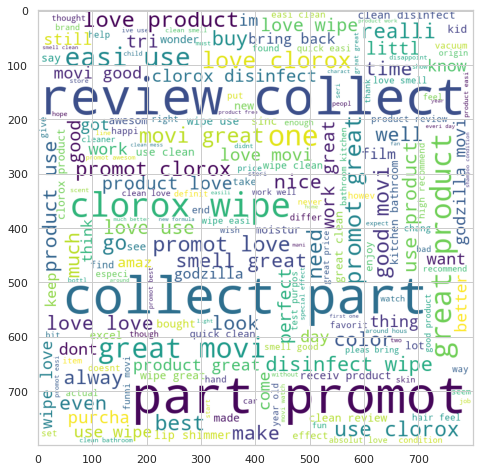

In [ ]:
generate_wordcloud('positive')

### Observations

- We see words like `love`, `good`, `great`

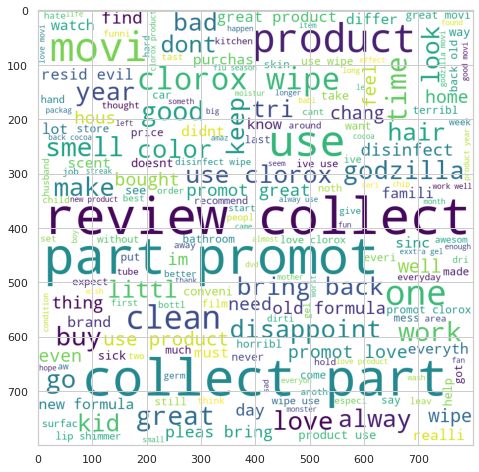

In [ ]:
generate_wordcloud('negative')

### Observations

- We see words loke `dissappoint`, `old`, `terribl`

## Feature extraction

In [ ]:
tvec = TfidfVectorizer()
tvec.fit(sentiment_df['text_data'])
X_text = tvec.transform(sentiment_df['text_data'])

In [ ]:
X_text.shape

(27395, 13451)

In [ ]:
tvec.get_feature_names()[:10]

['aaa',
 'aaaaaaaaaaaaaaaaa',
 'aaaaahhhhhh',
 'aaahhhhh',
 'aalot',
 'aanyhwer',
 'aaron',
 'aarontaylor',
 'ab',
 'abandon']

### Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_text, sentiment_df['user_sentiment'], test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21916, 13451)
(5479, 13451)
(21916,)
(5479,)


## Class imbalance issue

As we already saw that we have class imbalance issue where we have more positive feedback then negative.

So we resolve it using **SMOTE (Synthetic Minority Oversampling Technique) - Oversampling**

In [ ]:
print("Before OverSampling, counts of label 'positive': {}".format(sum(y_train == 'positive')))
print("Before OverSampling, counts of label 'negative': {} \n".format(sum(y_train == 'negative')))

sm = SMOTE(random_state = 0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label 'positive': {}".format(sum(y_train_res == 'positive')))
print("After OverSampling, counts of label 'negative': {}".format(sum(y_train_res == 'negative')))

Before OverSampling, counts of label 'positive': 19568
Before OverSampling, counts of label 'negative': 2348 

After OverSampling, the shape of X_train: (39136, 13451)
After OverSampling, the shape of y_train: (39136,) 

After OverSampling, counts of label 'positive': 19568
After OverSampling, counts of label 'negative': 19568


In [ ]:
print(X_train_res.shape)
print(y_train_res.shape)

(39136, 13451)
(39136,)


# Model building

## Using Logistic regression

- Lets also compare models before and after oversampling to see the improvement

### Starting with creating a model before oversampling

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train.ravel())
lr_prediction = lr.predict(X_test)

print(classification_report(y_test, lr_prediction))

              precision    recall  f1-score   support

    negative       0.81      0.19      0.31       573
    positive       0.91      0.99      0.95      4906

    accuracy                           0.91      5479
   macro avg       0.86      0.59      0.63      5479
weighted avg       0.90      0.91      0.89      5479



### After oversampling

In [ ]:
lr_normal = LogisticRegression()
lr_normal.fit(X_train_res, y_train_res.ravel())
lr_prediction = lr_normal.predict(X_test)

print(classification_report(y_test, lr_prediction))

              precision    recall  f1-score   support

    negative       0.42      0.75      0.54       573
    positive       0.97      0.88      0.92      4906

    accuracy                           0.86      5479
   macro avg       0.69      0.81      0.73      5479
weighted avg       0.91      0.86      0.88      5479



### Observations

- As we see oversampling has definately improved out f1 score for negative feedbacks

### Hyper parameter tuning

In [ ]:
params = [
  {'penalty' : ['l1', 'l2'],
  'C' : np.logspace(-4, 4, 20)}
]

grid_search = GridSearchCV(estimator=LogisticRegression(n_jobs=-1),
                           param_grid=params, cv=5)
grid_search.fit(X_train_res, y_train_res.ravel())

print("Logistic Regression Parameters: {}".format(grid_search.best_params_)) 
print("Best score: {}".format(grid_search.best_score_))

Logistic Regression Parameters: {'C': 1438.44988828766, 'penalty': 'l2'}
Best score: 0.9388331136224938


### Building Logistic regression model with the above parameters

In [ ]:
lr = LogisticRegression(C=1438.44988828766, penalty='l2', n_jobs=-1)
lr.fit(X_train_res, y_train_res.ravel())
lr_prediction = lr.predict(X_test)

print(classification_report(y_test, lr_prediction))

              precision    recall  f1-score   support

    negative       0.41      0.58      0.48       573
    positive       0.95      0.90      0.93      4906

    accuracy                           0.87      5479
   macro avg       0.68      0.74      0.70      5479
weighted avg       0.89      0.87      0.88      5479



### Observations

- GridSearchCV does not help us in getting any better score so we use the raw model

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res.ravel())
lr_prediction = lr.predict(X_test)

print(classification_report(y_test, lr_prediction))

              precision    recall  f1-score   support

    negative       0.44      0.79      0.57       588
    positive       0.97      0.88      0.92      4891

    accuracy                           0.87      5479
   macro avg       0.71      0.84      0.75      5479
weighted avg       0.92      0.87      0.89      5479



### Observations 

- We do not see much difference in the f1 score from the previous models

## Random forest

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(X_train_res, y_train_res.ravel())
rfc_prediction = rfc.predict(X_test)

print(classification_report(y_test, rfc_prediction))

              precision    recall  f1-score   support

    negative       0.57      0.35      0.43       573
    positive       0.93      0.97      0.95      4906

    accuracy                           0.90      5479
   macro avg       0.75      0.66      0.69      5479
weighted avg       0.89      0.90      0.89      5479



### Lets try to tune our hyper parameter and see if we get better results

In [ ]:
params = [
  {
      'criterion': ['gini', 'entropy'],
      'n_estimators' : [100, 200],
      'max_depth' : [5, 10]}
]

grid_search = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                           param_grid=params, cv=3)
grid_search.fit(X_train_res, y_train_res.ravel())

print("RandomForestClassifier Parameters: {}".format(grid_search.best_params_)) 
print("Best score: {}".format(grid_search.best_score_))

RandomForestClassifier Parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
Best score: 0.8273420581616775


### Model with tuned parameters

In [ ]:
rfc = RandomForestClassifier(criterion='gini', max_depth=10, n_estimators=200, n_jobs=-1)
rfc.fit(X_train_res, y_train_res.ravel())
rfc_prediction = rfc.predict(X_test)

print(classification_report(y_test, rfc_prediction))

              precision    recall  f1-score   support

    negative       0.33      0.50      0.40       573
    positive       0.94      0.88      0.91      4906

    accuracy                           0.84      5479
   macro avg       0.64      0.69      0.65      5479
weighted avg       0.87      0.84      0.86      5479



### Observations

- Random forest does not give us better results

## Naive Bayes model

In [ ]:
nb = MultinomialNB()

nb.fit(X_train_res, y_train_res.ravel())
nb_predictions = nb.predict(X_test)
 
print(classification_report(y_test, nb_predictions))

              precision    recall  f1-score   support

    negative       0.31      0.62      0.42       573
    positive       0.95      0.84      0.89      4906

    accuracy                           0.82      5479
   macro avg       0.63      0.73      0.65      5479
weighted avg       0.88      0.82      0.84      5479



### Observations

- Multinomial Naive Bayes does not give us any better f1 score

## SGD classifier

In [ ]:
sgd = SGDClassifier(n_jobs=-1)
sgd.fit(X_train_res, y_train_res.ravel())
sgd_predictions = sgd.predict(X_test)
 
print(classification_report(y_test, sgd_predictions))

              precision    recall  f1-score   support

    negative       0.37      0.76      0.50       573
    positive       0.97      0.85      0.91      4906

    accuracy                           0.84      5479
   macro avg       0.67      0.80      0.70      5479
weighted avg       0.91      0.84      0.86      5479



### Lets try some hyper parameter tuning

In [ ]:
params = [
  {
      'alpha': [0.0001, 0.001, 0.01],
      'max_iter' : [500, 1000, 1500]}
]
grid_search = GridSearchCV(estimator=SGDClassifier(n_jobs=-1),
                           param_grid=params, cv=3)
grid_search.fit(X_train_res, y_train_res.ravel())

print("SGDClassifier Parameters: {}".format(grid_search.best_params_)) 
print("Best score: {}".format(grid_search.best_score_))

SGDClassifier Parameters: {'alpha': 0.0001, 'max_iter': 1000}
Best score: 0.9012684769084768


### Model with the above parameters

In [ ]:
sgd = SGDClassifier(alpha=0.0001, max_iter=500, n_jobs=-1)
sgd.fit(X_train_res, y_train_res.ravel())
sgd_predictions = sgd.predict(X_test)
 
print(classification_report(y_test, sgd_predictions))

              precision    recall  f1-score   support

    negative       0.38      0.76      0.51       573
    positive       0.97      0.86      0.91      4906

    accuracy                           0.84      5479
   macro avg       0.67      0.81      0.71      5479
weighted avg       0.91      0.84      0.87      5479



### Observations

- SGDClassifier has performed better in comparision with other models but it's f1 score is same as Logistic regression model
- As the Logistic regression is quiet simpler, will choos LR model over SGD!!

### Using Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_res.toarray(), y_train_res.ravel())
gnb_predictions = gnb.predict(X_test.toarray())
 
print(classification_report(y_test, gnb_predictions))

              precision    recall  f1-score   support

    negative       0.11      0.71      0.19       573
    positive       0.91      0.33      0.48      4906

    accuracy                           0.37      5479
   macro avg       0.51      0.52      0.34      5479
weighted avg       0.82      0.37      0.45      5479



### Using Bernoulli Naive Bayes

### Observations

- GNB gives the worst f1 score

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train_res.toarray(), y_train_res.ravel())
bnb_predictions = bnb.predict(X_test.toarray())
 
print(classification_report(y_test, bnb_predictions))

              precision    recall  f1-score   support

    negative       0.29      0.34      0.32       573
    positive       0.92      0.90      0.91      4906

    accuracy                           0.84      5479
   macro avg       0.61      0.62      0.61      5479
weighted avg       0.86      0.84      0.85      5479



### Observations

- BernoulliNB does not give better f1 scores as well

# Recommendation system

Now that we are done with model building we will now work on the recommendation system

In [ ]:
recommendation_df = final_ratings[['id', 'reviews_rating', 'reviews_username']]
recommendation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27395 entries, 3 to 29999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                27395 non-null  object
 1   reviews_rating    27395 non-null  int64 
 2   reviews_username  27395 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


### Train test split

In [ ]:
train, test = train_test_split(recommendation_df, test_size=0.2, random_state=3)

### Creating dummy train and dummy test datasets

In [ ]:
dummy_train = train.copy()
dummy_train.head()

,id,reviews_rating,reviews_username
12528,AVpf3VOfilAPnD_xjpun,5,betsy123456
7091,AVpf3VOfilAPnD_xjpun,4,carlaw
24757,AVpfPaoqLJeJML435Xk9,5,siskokid106
29648,AVpfW8y_LJeJML437ySW,5,sydneykay
4798,AVpf0eb2LJeJML43EVSt,5,cap4676


In [ ]:
dummy_train.shape

(21916, 3)

### Marking not rated products as 1

In [ ]:
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x : 0 if x >= 1 else 1)

In [ ]:
dummy_train = dummy_train.reset_index().pivot_table(index='reviews_username', 
                                                    columns='id',
                                                    values='reviews_rating').fillna(1)
dummy_train.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
01impala,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
02dakota,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
02deuce,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
06stidriver,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Convert dummy train dataset into matrix format

In [ ]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating',
).fillna(0)
print('Pivot table shape: ' + str(df_pivot.shape))
df_pivot.head()

Pivot table shape: (19029, 202)


id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
01impala,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
02dakota,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
02deuce,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
06stidriver,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### User similarity Matrix

### Using Cosine Similarity

- Creating user similarity matrix using pairwise_distance function

In [ ]:
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]


In [ ]:
user_correlation.shape

(19029, 19029)

### User - User prediction

### Make negative values to zero


In [ ]:
user_correlation[user_correlation < 0] = 0
user_correlation

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

### Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset).

In [ ]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[ 0.        , 15.11422463,  0.        , ...,  0.        ,
         1.57527984,  0.        ],
       [ 3.4701425 , 24.81772875,  0.        , ...,  0.        ,
         3.66576437,  0.        ],
       [ 3.4701425 , 24.81772875,  0.        , ...,  0.        ,
         3.66576437,  0.        ],
       ...,
       [ 0.43033148, 13.15260532,  0.        , ...,  0.        ,
         3.53553391,  0.        ],
       [ 0.        , 15.11422463,  0.        , ...,  0.        ,
         1.57527984,  0.        ],
       [ 0.43033148, 13.15260532,  0.        , ...,  0.        ,
         3.53553391,  0.        ]])

In [ ]:
user_predicted_ratings.shape

(19029, 202)

### Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero. 

In [ ]:
user_final_rating = np.multiply(user_predicted_ratings, dummy_train)
user_final_rating.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.00,15.11,0.00,0.00,1.81,0.00,2.24,0.00,0.00,0.00,...,1.78,0.42,2.89,0.00,1.58,0.00,0.00,0.00,1.58,0.00
01impala,3.47,24.82,0.00,0.00,0.00,1.73,0.00,1.63,0.00,0.00,...,1.78,0.00,0.00,0.00,1.46,0.00,0.00,0.00,3.67,0.00
02dakota,3.47,24.82,0.00,0.00,0.00,1.73,0.00,1.63,0.00,0.00,...,1.78,0.00,0.00,0.00,1.46,0.00,0.00,0.00,3.67,0.00
02deuce,3.47,24.82,0.00,0.00,0.00,1.73,0.00,1.63,0.00,0.00,...,1.78,0.00,0.00,0.00,1.46,0.00,0.00,0.00,3.67,0.00
06stidriver,0.43,13.15,0.00,0.00,2.89,3.54,4.63,0.00,0.00,0.00,...,0.00,0.42,0.00,0.00,0.00,0.00,0.00,0.00,3.54,0.00


### Finding the top 5 recommendation for the *user*

In [ ]:
# Take the user ID as input.
user_input = str(input("Enter your user name: "))
print(user_input)

Enter your user name: zapman
zapman


In [ ]:
user_final_rating.head(2)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.00,15.11,0.00,0.00,1.81,0.00,2.24,0.00,0.00,0.00,...,1.78,0.42,2.89,0.00,1.58,0.00,0.00,0.00,1.58,0.00
01impala,3.47,24.82,0.00,0.00,0.00,1.73,0.00,1.63,0.00,0.00,...,1.78,0.00,0.00,0.00,1.46,0.00,0.00,0.00,3.67,0.00


### Evaluating User-User based

### Find out the common users of test and train dataset.

In [ ]:
common_users = test[test.reviews_username.isin(train.reviews_username)]
print('Shape: ' + str(common_users.shape))
common_users.head()

Shape: (1250, 3)


,id,reviews_rating,reviews_username
17653,AVpfBrUZilAPnD_xTUly,5,shopsalot505
8993,AVpf3VOfilAPnD_xjpun,5,theresa79
22581,AVpfOmKwLJeJML435GM7,4,k1971
4185,AVpe9W4D1cnluZ0-avf0,4,cleaner mom
14667,AVpf3VOfilAPnD_xjpun,5,jillian4


### Create pivot table for common users

In [ ]:
common_users_pivot = common_users.reset_index().pivot_table(index='reviews_username',
                                                            columns='id',
                                                            values='reviews_rating')
common_users_pivot.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,...,AVpfl6sF1cnluZ0-nmwC,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### Convert the user_correlation matrix into dataframe

In [ ]:
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19019,19020,19021,19022,19023,19024,19025,19026,19027,19028
0,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.47,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.47,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.47,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.47,1.00,...,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00


In [ ]:
user_correlation_df['reviews_username'] = df_pivot.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19019,19020,19021,19022,19023,19024,19025,19026,19027,19028
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
01impala,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.47,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
02dakota,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.47,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
02deuce,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.47,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
06stidriver,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.47,1.00,...,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00


In [ ]:
common_users.head(1)

,id,reviews_rating,reviews_username
17653,AVpfBrUZilAPnD_xTUly,5,shopsalot505


In [ ]:
list_name = common_users['reviews_username'].tolist()
user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [ ]:
user_correlation_df_1.shape

(1103, 19029)

In [ ]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [ ]:
user_correlation_df_3 = user_correlation_df_2.T

In [ ]:
user_correlation_df_3.head()

,00sab00,1234567,123charlie,1943,4cloroxl,50cal,85lisa,8ellie24,abby,abcdef,...,worm,xlivayy,yayatex,yeya,yoadrian,yohnie1,zapman,zipper,zippy,zxcsdfd
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1234567,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.71,0.00,0.00,0.00,1.00
123charlie,0.00,0.00,1.00,0.51,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.60,0.00
1943,0.00,0.00,0.51,1.00,0.00,0.00,0.00,0.00,0.61,0.86,...,0.00,0.00,0.00,0.00,0.51,0.00,0.00,0.51,0.31,0.00
4cloroxl,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.71,0.00,0.00,0.00,1.00


In [ ]:
user_correlation_df_3.shape

(1103, 1103)

In [ ]:
user_correlation_df_3[user_correlation_df_3 < 0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_users_pivot.fillna(0))
common_user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 2.88675135,
        2.43685089],
       [0.        , 0.        , 0.        , ..., 0.        , 5.34858117,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.81901719, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.81901719, 0.        ,
        0.        ],
       [0.8       , 0.        , 0.        , ..., 1.09141031, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 5.34858117,
        0.        ]])

In [ ]:
dummy_test = common_users.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x : 1 if x >= 1 else 0)


dummy_test = dummy_test.pivot_table(
    index='reviews_username', 
    columns='id', 
    values='reviews_rating'
    ).fillna(0)

In [ ]:
dummy_test

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,...,AVpfl6sF1cnluZ0-nmwC,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1234567,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
123charlie,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1943,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4cloroxl,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yohnie1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
zapman,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
zipper,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
dummy_test.shape

(1103, 84)

In [ ]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [ ]:
common_user_predicted_ratings.head(2)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,...,AVpfl6sF1cnluZ0-nmwC,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1234567,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Calculating the RMSE for only the movies rated by user. For RMSE, normalising the rating to (1,5) range.

In [ ]:
X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
common_ = common_users.pivot_table(
    index='reviews_username', 
    columns='id', 
    values='reviews_rating',
    )

In [ ]:
common_

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,...,AVpfl6sF1cnluZ0-nmwC,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yohnie1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zapman,NaN,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zipper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

### Finding total non-NaN value

In [ ]:
total_non_nan = np.count_nonzero(~np.isnan(y))
total_non_nan

1226

In [ ]:
mse = ((y - common_) ** 2).mean()
mse

id
AV16khLE-jtxr-f38VFn    0.00
AV1YGDqsGV-KLJ3adc-O    2.50
AV1YlENIglJLPUi8IHsX    4.00
AV1YmDL9vKc47QAVgr7_    0.00
AV1Ymf_rglJLPUi8II2v   16.00
                        ... 
AVpfrFDZLJeJML43Bmv0   16.00
AVpfrTyiLJeJML43BrSI    9.00
AVpfrgjFLJeJML43BvCc   16.00
AVpfthSailAPnD_xg3ON   16.00
AVpfv4TlilAPnD_xhjNS   16.00
Length: 84, dtype: float64

In [ ]:
rmse = (sum(mse)/total_non_nan) ** 0.5
rmse

0.7909084636106918

In [ ]:
# rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
# print(rmse)

## Item-Item similarity

In [ ]:
df_pivot = train.reset_index().pivot_table(values='reviews_rating', 
                                           index='reviews_username', 
                                           columns='id').T
df_pivot.head()

reviews_username,00sab00,01impala,02dakota,02deuce,06stidriver,1085,10ten,1143mom,1234,1234561,...,zsazsa,zt313,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmDL9vKc47QAVgr7_,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
item_correlation = 1 - pairwise_distances(df_pivot.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
item_correlation

array([[1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.       , ..., 0.       , 0.0055786,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        0.       ],
       [0.       , 0.0055786, 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.       ]])

In [ ]:
item_correlation.shape

(202, 202)

### Replacing the negetive correlation with 0

In [ ]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.       , ..., 0.       , 0.0055786,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        0.       ],
       [0.       , 0.0055786, 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.       ]])

### Item-Item prediction

In [ ]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.0544353 , 0.        , ..., 0.        , 0.01133298,
        0.        ],
       [0.02744703, 0.0459576 , 0.        , ..., 0.        , 0.0091937 ,
        0.        ],
       [0.04574505, 0.076596  , 0.        , ..., 0.        , 0.01532283,
        0.        ],
       ...,
       [0.00454725, 0.02286159, 0.        , ..., 0.        , 0.00512133,
        0.        ],
       [0.        , 0.0907255 , 0.        , ..., 0.        , 0.01888831,
        0.        ],
       [0.0036378 , 0.01828927, 0.        , ..., 0.        , 0.00409706,
        0.        ]])

In [ ]:
item_predicted_ratings.shape

(19029, 202)

In [ ]:
dummy_train.shape

(19029, 202)

### Filtering the rating only for the products not rated by the user for recommendation

In [ ]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.00,0.05,0.00,0.00,0.02,0.00,0.03,0.00,0.00,0.00,...,0.04,0.01,0.04,0.00,0.10,0.00,0.00,0.00,0.01,0.00
01impala,0.03,0.05,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,...,0.02,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.01,0.00
02dakota,0.05,0.08,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.00,...,0.03,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.02,0.00
02deuce,0.04,0.06,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.00,...,0.02,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.01,0.00
06stidriver,0.00,0.02,0.00,0.00,0.01,0.01,0.03,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00


### Evaluate Item-Item

In [ ]:
common =  test[test.id.isin(train.id)]
common.shape

(5469, 3)

In [ ]:
common.head()

,id,reviews_rating,reviews_username
9846,AVpf3VOfilAPnD_xjpun,5,smi95
22275,AVpfOIrkilAPnD_xXgDG,4,spirit
24608,AVpfPaoqLJeJML435Xk9,5,tonyg7864
17653,AVpfBrUZilAPnD_xTUly,5,shopsalot505
8993,AVpf3VOfilAPnD_xjpun,5,theresa79


In [ ]:
common_item_based_matrix = common.reset_index().pivot_table(values='reviews_rating', 
                                                            index='reviews_username', 
                                                            columns='id').T
common_item_based_matrix.shape

(139, 5209)

In [ ]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.01,0.00
2,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
item_correlation_df['id'] = df_pivot.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()
list_name = common.id.tolist()
item_correlation_df.columns = df_pivot.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

In [ ]:
item_correlation_df_3 = item_correlation_df_2.T
item_correlation_df_3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.00
AV1YGDqsGV-KLJ3adc-O,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
AV1YlENIglJLPUi8IHsX,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
AV1YmBrdGV-KLJ3adewb,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
AV1YmDL9vKc47QAVgr7_,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
item_correlation_df_3[item_correlation_df_3<0]=0
common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.00339653, 0.00454725, ..., 0.        , 0.        ,
        0.00454725],
       [0.06775243, 0.02387262, 0.02286159, ..., 0.02621402, 0.07412233,
        0.02286159],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00592926, 0.00512133, ..., 0.        , 0.        ,
        0.00512133],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
common_item_predicted_ratings.shape

(139, 5209)

In [ ]:
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x >= 1 else 0)

In [ ]:
dummy_test = dummy_test.reset_index().pivot_table(values='reviews_rating', 
                                                  index='reviews_username', 
                                                  columns='id').T.fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

### The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

In [ ]:
common_ = common.reset_index().pivot_table(values='reviews_rating',
                                           index='reviews_username', 
                                           columns='id').T

In [ ]:
X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
scaler.fit(X)

MinMaxScaler(feature_range=(1, 5))

In [ ]:
y = (scaler.transform(X))
y

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
non_nan = np.count_nonzero(~np.isnan(y))
non_nan

5382

In [ ]:
mse = ((y - common_) ** 2).mean()
mse

reviews_username
00dog3       9.00
00sab00      0.00
0325home    16.00
08dallas    16.00
09mommy11   16.00
             ... 
zoeyny      16.00
zoso60      16.00
zowie       16.00
zulaa118    16.00
zxcsdfd     16.00
Length: 5209, dtype: float64

In [ ]:
rmse = (sum(mse)/non_nan) ** 0.5
rmse

3.570232952177649

In [ ]:
# Finding total non-NaN value
# 
# rmse = (sum(sum((common_ - y )**2))/non_nan)**0.5
# print(rmse)

### Observations

- Since the RMSE of User-User is lower then Item-Item, we use User-User based recommendation

### We already observed that `LogisticRegression` gave us the best results so we export it as a pkl file

In [ ]:
lr_file = open('/content/drive/MyDrive/Colab Notebooks/capstone/fresh/Sentiment_model.pkl', 'ab')
pickle.dump(lr, lr_file)
lr_file.close()

### Saving tfidf vector object

In [ ]:
vec_file = open('/content/drive/MyDrive/Colab Notebooks/capstone/fresh/tfidf_vectorizer.pkl', 'ab')
pickle.dump(tvec, vec_file)
vec_file.close()

### Exporting user-user based recommendation model

In [ ]:
user_final_rating.to_pickle('/content/drive/MyDrive/Colab Notebooks/capstone/fresh/user_recommendation.pkl')
user_final_rating.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.00,15.11,0.00,0.00,1.81,0.00,2.24,0.00,0.00,0.00,...,1.78,0.42,2.89,0.00,1.58,0.00,0.00,0.00,1.58,0.00
01impala,3.47,24.82,0.00,0.00,0.00,1.73,0.00,1.63,0.00,0.00,...,1.78,0.00,0.00,0.00,1.46,0.00,0.00,0.00,3.67,0.00
02dakota,3.47,24.82,0.00,0.00,0.00,1.73,0.00,1.63,0.00,0.00,...,1.78,0.00,0.00,0.00,1.46,0.00,0.00,0.00,3.67,0.00
02deuce,3.47,24.82,0.00,0.00,0.00,1.73,0.00,1.63,0.00,0.00,...,1.78,0.00,0.00,0.00,1.46,0.00,0.00,0.00,3.67,0.00
06stidriver,0.43,13.15,0.00,0.00,2.89,3.54,4.63,0.00,0.00,0.00,...,0.00,0.42,0.00,0.00,0.00,0.00,0.00,0.00,3.54,0.00


In [ ]:
user_reco_file = open('/content/drive/MyDrive/Colab Notebooks/capstone/fresh/user_recommendation.pkl', 'rb')
user_reco_table = pickle.load(user_reco_file)
user_reco_table.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.00,15.11,0.00,0.00,1.81,0.00,2.24,0.00,0.00,0.00,...,1.78,0.42,2.89,0.00,1.58,0.00,0.00,0.00,1.58,0.00
01impala,3.47,24.82,0.00,0.00,0.00,1.73,0.00,1.63,0.00,0.00,...,1.78,0.00,0.00,0.00,1.46,0.00,0.00,0.00,3.67,0.00
02dakota,3.47,24.82,0.00,0.00,0.00,1.73,0.00,1.63,0.00,0.00,...,1.78,0.00,0.00,0.00,1.46,0.00,0.00,0.00,3.67,0.00
02deuce,3.47,24.82,0.00,0.00,0.00,1.73,0.00,1.63,0.00,0.00,...,1.78,0.00,0.00,0.00,1.46,0.00,0.00,0.00,3.67,0.00
06stidriver,0.43,13.15,0.00,0.00,2.89,3.54,4.63,0.00,0.00,0.00,...,0.00,0.42,0.00,0.00,0.00,0.00,0.00,0.00,3.54,0.00


### saving the clean sentiment data frame for prediction

In [ ]:
sentiment_df.to_pickle('/content/drive/MyDrive/Colab Notebooks/capstone/fresh/sentiment_df.pkl')

In [ ]:
ratings.to_pickle('/content/drive/MyDrive/Colab Notebooks/capstone/fresh/product_review.pkl')

## Recommendation of Top 20 Products to a Specified User

### Get top 20 recommendations

In [ ]:
product_ids = user_final_rating.loc[user_input].sort_values(ascending=False)[:20]
product_ids.head()

id
AVpfPaoqLJeJML435Xk9   24.82
AVpe41TqilAPnD_xQH3d   15.96
AVpe59io1cnluZ0-ZgDU   15.11
AVpfRTh1ilAPnD_xYic2   13.36
AVpf2tw1ilAPnD_xjflC   13.30
Name: zapman, dtype: float64

### Mapping product with ids

In [ ]:
product_map = pd.DataFrame(ratings[['id','name']]).drop_duplicates()
product_map.head()

,id,name
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
31,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar
40,AV1h6Gu0glJLPUi8IjA_,"Johnson's Baby Bubble Bath and Wash, 15oz"
54,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream


In [ ]:
products = pd.merge(product_ids, product_map, on='id')
products['name'].head(20)

0     Godzilla 3d Includes Digital Copy Ultraviolet ...
1          Mike Dave Need Wedding Dates (dvd + Digital)
2     My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
3     Planes: Fire Rescue (2 Discs) (includes Digita...
4                      Red (special Edition) (dvdvideo)
5     Clorox Disinfecting Wipes Value Pack Scented 1...
6                     Tostitos Bite Size Tortilla Chips
7                                Hormel Chili, No Beans
8                  Clorox Disinfecting Bathroom Cleaner
9     Avery174 Ready Index Contemporary Table Of Con...
10                       Jason Aldean - They Don't Know
11    Lysol Concentrate Deodorizing Cleaner, Origina...
12                      Burt's Bees Lip Shimmer, Raisin
13                   There's Something About Mary (dvd)
14       The Resident Evil Collection 5 Discs (blu-Ray)
15                      Stander Pt Bedcane - Bed Handle
16    Creme Of Nature Intensive Conditioning Treatme...
17            Chester's Cheese Flavored Puffcorn

In [ ]:
products.shape

(20, 3)

### Observations

- Above are the top20 products recommended for the given user

# Refining recommendations using sentiment based analysis and the top 20 recommendations

- Using all the data above to recommend top 5 products

In [ ]:
sentiment_df[['id', 'text_data', 'user_sentiment']]

,id,text_data,user_sentiment
3,AV16khLE-jtxr-f38VFn,disappoint read review look buy one coupl lubr...,negative
4,AV16khLE-jtxr-f38VFn,irrit husband bought gel u gel caus irrit felt...,negative
5,AV16khLE-jtxr-f38VFn,worth boyfriend bought spice thing bedroom hig...,negative
6,AV16khLE-jtxr-f38VFn,disappoint bought earlier today excit check ba...,negative
7,AV16khLE-jtxr-f38VFn,happi bought product husband tri impress tingl...,negative
...,...,...,...
29995,AVpfW8y_LJeJML437ySW,soft got condition influenst tri im love far o...,positive
29996,AVpfW8y_LJeJML437ySW,love love receiv review purpos influenst leaf ...,positive
29997,AVpfW8y_LJeJML437ySW,hair smooth use first love smell product wash ...,positive
29998,AVpfW8y_LJeJML437ySW,perfect oili hair receiv influenst never go ba...,positive


### Mapping products with product reviews

In [ ]:
product_mapping_review = pd.DataFrame(sentiment_df[['id','text_data','user_sentiment']]).drop_duplicates()
product_review_data =pd.merge(products, product_mapping_review, on='id')
product_review_data

,id,zapman,name,text_data,user_sentiment
0,AVpfPaoqLJeJML435Xk9,24.82,Godzilla 3d Includes Digital Copy Ultraviolet ...,aw could left one shelf great box,positive
1,AVpfPaoqLJeJML435Xk9,24.82,Godzilla 3d Includes Digital Copy Ultraviolet ...,much wors expect movi much wors expect broderi...,positive
2,AVpfPaoqLJeJML435Xk9,24.82,Godzilla 3d Includes Digital Copy Ultraviolet ...,dont get hype dont get hype godzilla frank mov...,negative
3,AVpfPaoqLJeJML435Xk9,24.82,Godzilla 3d Includes Digital Copy Ultraviolet ...,best item littl disappoint like godzilla movi ...,negative
4,AVpfPaoqLJeJML435Xk9,24.82,Godzilla 3d Includes Digital Copy Ultraviolet ...,good movi bad packag sale bought got case brok...,negative
...,...,...,...,...,...
19470,AVpfcu821cnluZ0-k8ep,3.08,Vaseline Intensive Care Lip Therapy Cocoa Butter,obsess worst chap lip winter discov stuff chan...,positive
19471,AVpfcu821cnluZ0-k8ep,3.08,Vaseline Intensive Care Lip Therapy Cocoa Butter,best veslin best noth say smell die,positive
19472,AVpfcu821cnluZ0-k8ep,3.08,Vaseline Intensive Care Lip Therapy Cocoa Butter,best lip care product ever ive tri three type ...,positive
19473,AVpfcu821cnluZ0-k8ep,3.08,Vaseline Intensive Care Lip Therapy Cocoa Butter,wonder product sinc infant mummi use vaselin m...,positive


### Getting feature vectors

In [ ]:
tfidf_features = tvec.transform(product_review_data['text_data'])

# Predict Sentiment Score on the above Product Reviews using the finally selected `LogisticRegression` model

In [ ]:
product_review_data['predicted_sentiment'] = lr.predict(tfidf_features)
product_review_data.head()

,id,zapman,name,text_data,user_sentiment,predicted_sentiment
0,AVpfPaoqLJeJML435Xk9,24.82,Godzilla 3d Includes Digital Copy Ultraviolet ...,aw could left one shelf great box,positive,negative
1,AVpfPaoqLJeJML435Xk9,24.82,Godzilla 3d Includes Digital Copy Ultraviolet ...,much wors expect movi much wors expect broderi...,positive,positive
2,AVpfPaoqLJeJML435Xk9,24.82,Godzilla 3d Includes Digital Copy Ultraviolet ...,dont get hype dont get hype godzilla frank mov...,negative,negative
3,AVpfPaoqLJeJML435Xk9,24.82,Godzilla 3d Includes Digital Copy Ultraviolet ...,best item littl disappoint like godzilla movi ...,negative,negative
4,AVpfPaoqLJeJML435Xk9,24.82,Godzilla 3d Includes Digital Copy Ultraviolet ...,good movi bad packag sale bought got case brok...,negative,negative


In [ ]:
print(classification_report(product_review_data['user_sentiment'], product_review_data['predicted_sentiment']))

              precision    recall  f1-score   support

    negative       0.47      0.88      0.62      1924
    positive       0.99      0.89      0.94     17551

    accuracy                           0.89     19475
   macro avg       0.73      0.89      0.78     19475
weighted avg       0.94      0.89      0.90     19475



### Observations

- Using `user_sentiments` and `predicted_sentiments` we calculated f1 score

In [ ]:
product_review_data['predicted_sentiment_score'] = product_review_data['predicted_sentiment'].replace(['negative','positive'],[0,1])
product_review_data.head()

,id,zapman,name,text_data,user_sentiment,predicted_sentiment,predicted_sentiment_score
0,AVpfPaoqLJeJML435Xk9,24.82,Godzilla 3d Includes Digital Copy Ultraviolet ...,aw could left one shelf great box,positive,negative,0
1,AVpfPaoqLJeJML435Xk9,24.82,Godzilla 3d Includes Digital Copy Ultraviolet ...,much wors expect movi much wors expect broderi...,positive,positive,1
2,AVpfPaoqLJeJML435Xk9,24.82,Godzilla 3d Includes Digital Copy Ultraviolet ...,dont get hype dont get hype godzilla frank mov...,negative,negative,0
3,AVpfPaoqLJeJML435Xk9,24.82,Godzilla 3d Includes Digital Copy Ultraviolet ...,best item littl disappoint like godzilla movi ...,negative,negative,0
4,AVpfPaoqLJeJML435Xk9,24.82,Godzilla 3d Includes Digital Copy Ultraviolet ...,good movi bad packag sale bought got case brok...,negative,negative,0


In [ ]:
product_pivot = product_review_data.reset_index().pivot_table(values='predicted_sentiment_score', index='name', aggfunc='mean')
product_pivot.sort_values(by='predicted_sentiment_score',inplace= True, ascending= False)
product_pivot.head()

,predicted_sentiment_score
name,
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),0.94
"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",0.93
Red (special Edition) (dvdvideo),0.91
Clorox Disinfecting Bathroom Cleaner,0.86
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),0.85


### Observations

- Using `predicted_sentiment_score` recommensing top 5 products

In [ ]:
!pip freeze --local > '/content/drive/MyDrive/Colab Notebooks/capstone/fresh/requirements.txt'